# Pysynphot Development - Python Synthetic Photometry

 > A script for developing various functions that use pysynphot models

In [1]:
import numpy as np
import pysynphot as S
import matplotlib.pyplot as plt

## Current Scripts

In [2]:
def create_stellar_obs(aperture, central_obscuration, nwavels, wl_range, star_dict):
    """
    Creates an observation object from pysynphot phoenix models
    
    Parameters:
        Aperture (cm): Aperture of the telescope
        central_obscuration (cm): diameter of central obscuration of telescope
        nwaels: number of wavelengths to sample
        wl_range (Angstroms): [first wavelength, last wavelength] 
        star_dict: dictionary of the following structure
            {"mag": float, # vega mag
            "Teff": int,
            "Z": float,
            "log g": float}
            
    Returns:
        A pysynphot observation object describing the star being observed through the given telescope architecture 
    """
    
    # Set Telescope values
    r = (aperture-central_obscuration)/2
    collecting_area = (np.pi * r**2)
    S.refs.setref(area=collecting_area) # Takes units of cm^2
    wavels = np.linspace(wl_range[0], wl_range[1] ,nwavels)
    throughput = np.ones(nwavels)
    bandpass = S.ArrayBandpass(wavels, throughput)
    
    # Create star object
    star_obj = S.Icat('phoenix', star_dict["Teff"], star_dict["Z"], star_dict["log g"])
    spec_filt = star_obj.renorm(star_dict["mag"], 'vegamag', bandpass)
    
    # Create observation object
    obs = S.Observation(spec_filt, bandpass, binset=wavels)
    
    return obs

## Development area

___

Path to Pysynphot models:

> /Users/louis/Projects/Toliman/Zemax/lib/Pysynphot_models/grp/hst/cdbs/
    
To add this to path in bash:

> "export PYSYN_CDBS=/Users/louis/Projects/Toliman/Zemax/lib/Pysynphot_models/grp/hst/cdbs/"
    
After doing this you must restart your jupyter session in the **same terminal session**
    
___

If you have not downloaded the models go to http://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/synphot-throughput-tables.html and download the pheonix or any other models desired and place them in the file structure as determined above. 

> Note that "gps/hst/cdsb/" is part of the file structure that they use (ie I have installed in "Pysynphot_models" but still need to add the extra directories to the path)

In [3]:
aperture = 10 #cm diameter
central_obscuration = 1.75 
nwavels = 1001
wl_range = [4450, 5450] # Angstroms
acenA_mag = 0.01
acenB_mag = 1.33

In [4]:
r = (aperture-central_obscuration)/2
collecting_area = (np.pi * r**2)
S.refs.setref(area=collecting_area) # Takes units of cm^2

In [5]:
# alpha cen A: Teff = 5790, Z = 0.20, log g = 4.30
acenA = S.Icat('phoenix',5790,0.2,4.30)

# alpha cen B: Teff = 5260, Z = 0.23, log g = 4.37
acenB = S.Icat('phoenix',5260,0.23,4.37)

In [6]:
wavels = np.linspace(wl_range[0], wl_range[1] ,nwavels)
throughput = np.ones(nwavels)
bandpass = S.ArrayBandpass(wavels, throughput)
specA_filt = acenA.renorm(acenA_mag, 'vegamag', bandpass)
specB_filt = acenB.renorm(acenB_mag, 'vegamag', bandpass)
acenA_obs = S.Observation(specA_filt, bandpass, binset=wavels)
acenB_obs = S.Observation(specB_filt, bandpass, binset=wavels)

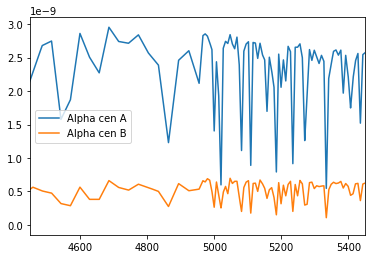

In [7]:
plt.plot(acenA_obs.wave, acenA_obs.flux, label="Alpha cen A")
plt.plot(acenB_obs.wave, acenB_obs.flux, label="Alpha cen B")
plt.xlim(wl_range[0], wl_range[1])
plt.legend()
plt.show()

In [8]:
print(acenA_obs.countrate(), "Photons per second")
print(acenB_obs.countrate(), "Photons per second")

31419332.45655235 Photons per second
6791584.591141336 Photons per second
